# importing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib.patches import Polygon





def load_and_clean_data(sheet_name):
    
    df = pd.read_excel('5-3tillApril.xlsb', sheet_name=sheet_name)
    

    df = df.dropna(axis=0, how='all')
    df = df.dropna(axis=1, how='all')
    rows_to_remove = [0]
    df = df.drop(df.index[rows_to_remove])
    df.columns = df.iloc[1]
    df = df.drop(df.index[1])
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])




    '''This part is hidden due to confidentiality reasons'''
    
    return df_selected

df_2023 = load_and_clean_data('2023B Fırın Renk Fiili')
df_2024 = load_and_clean_data('2024B Fırın Renk Fiili')
df_2025 = load_and_clean_data('2025B Fırın Renk Fiili')
df_combined = pd.concat([df_2023, df_2024, df_2025], ignore_index=True)

print("Total number of rows in Dataset")
print(len(df_combined))



features_removed = ['Date']  

df_combined1= df_combined.drop(columns= features_removed)

df_selected=df_combined1



C:\Users\DELL\AppData\Local\Temp\ipykernel_51972\4065458482.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_rename_map, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_51972\4065458482.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_rename_map, inplace=True)


Total number of rows in Dataset
1455


C:\Users\DELL\AppData\Local\Temp\ipykernel_51972\4065458482.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_rename_map, inplace=True)


# Analysis for Data cleaning

In [2]:
df_selected['CP-5'] = pd.to_numeric(df_selected['CP-5'], errors='coerce')



import pandas as pd
import numpy as np
from scipy import stats

from pyod.models.knn import KNN
df_selected.head()
df=df_selected

#converting dtype object to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass  # leave as-is if it can't be converted



# Exact Duplicate Rows
duplicates = df[df.duplicated()]
print(f"Found {len(duplicates)} exact duplicates.")
partial_duplicates = df[df.duplicated(subset=['a', 'b'])]
print(f"Found {len(partial_duplicates)} partial duplicates on col1 & col2.")
numeric_cols = df.select_dtypes(include=np.number).columns
print(numeric_cols)



Found 0 exact duplicates.
Found 4 partial duplicates on col1 & col2.
Index(['a', 'b', 'Time', 'Iron(Fe2+)', 'Fe2O3', 'RM-1', 'RM-2', 'RM-3', 'RM-4',
       'UOT-1', 'UOT-2', 'UOT-3', 'UOT-4', 'AOT-1', 'AOT-2', 'CP-1', 'CP-2',
       'CP-4', 'CP-3', 'CP-5', 'CP-6', 'CP-7', 'CP-8', 'LOT-1', 'LOT-2',
       'LOT-3', 'LOT-4', 'LOT-5', 'LOT-6', 'LOT-7', 'LOT-8', 'LOT-9', 'LOT-10',
       'LOT-11'],
      dtype='object')


In [3]:
model = KNN()
model.fit(df[numeric_cols].dropna())

outlier_scores = model.decision_scores_
outliers_detected = np.where(outlier_scores > np.percentile(outlier_scores, 94))[0]

print(f"Detected {len(outliers_detected)} multivariate outliers.")

#print(outliers_detected)
outlier_rows = df.iloc[outliers_detected]

df_clean = df.drop(index=outliers_detected)
print(df_clean.columns)

Detected 88 multivariate outliers.
Index(['a', 'b', 'Time', 'Iron(Fe2+)', 'Fe2O3', 'RM-1', 'RM-2', 'RM-3', 'RM-4',
       'UOT-1', 'UOT-2', 'UOT-3', 'UOT-4', 'AOT-1', 'AOT-2', 'CP-1', 'CP-2',
       'CP-4', 'CP-3', 'CP-5', 'CP-6', 'CP-7', 'CP-8', 'LOT-1', 'LOT-2',
       'LOT-3', 'LOT-4', 'LOT-5', 'LOT-6', 'LOT-7', 'LOT-8', 'LOT-9', 'LOT-10',
       'LOT-11'],
      dtype='object')


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler



df_selected= df_clean

# Define target columns and features to remove
target_columns = ['a', 'b']

features_removed=['Time','RM-2','CP-8','RM-4', 'UOT-3','LOT-6',
                   'UOT-2', 
                   'UOT-1',
                   'CP-2',
                   'LOT-5']




# Prepare data
X = df_selected.drop(columns=target_columns + features_removed)
y = df_selected[target_columns]

# 1) reserve last 3 rows for final test
X_test = X.iloc[-3:]
y_test = y.iloc[-3:]

# 2) everything except those last 9 rows goes into train+val
X_train_val = X.iloc[:-3]
y_train_val = y.iloc[:-3]


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

y_scaler = RobustScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

# shap for feature "a"


SHAP Summary Plot for XGBoost_Tuned


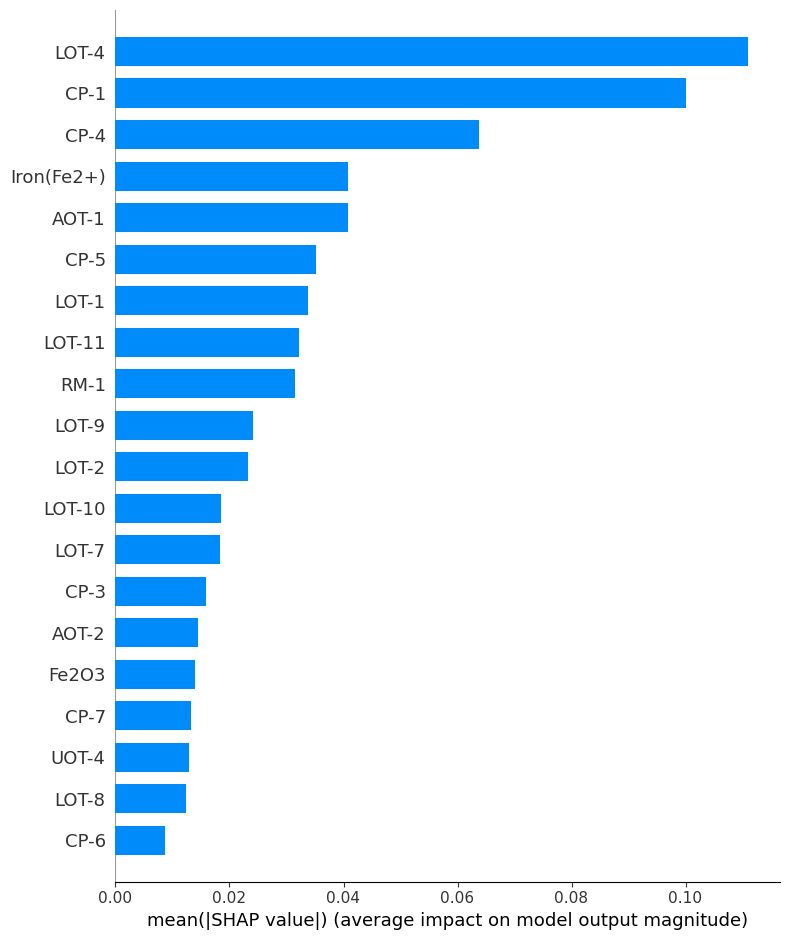

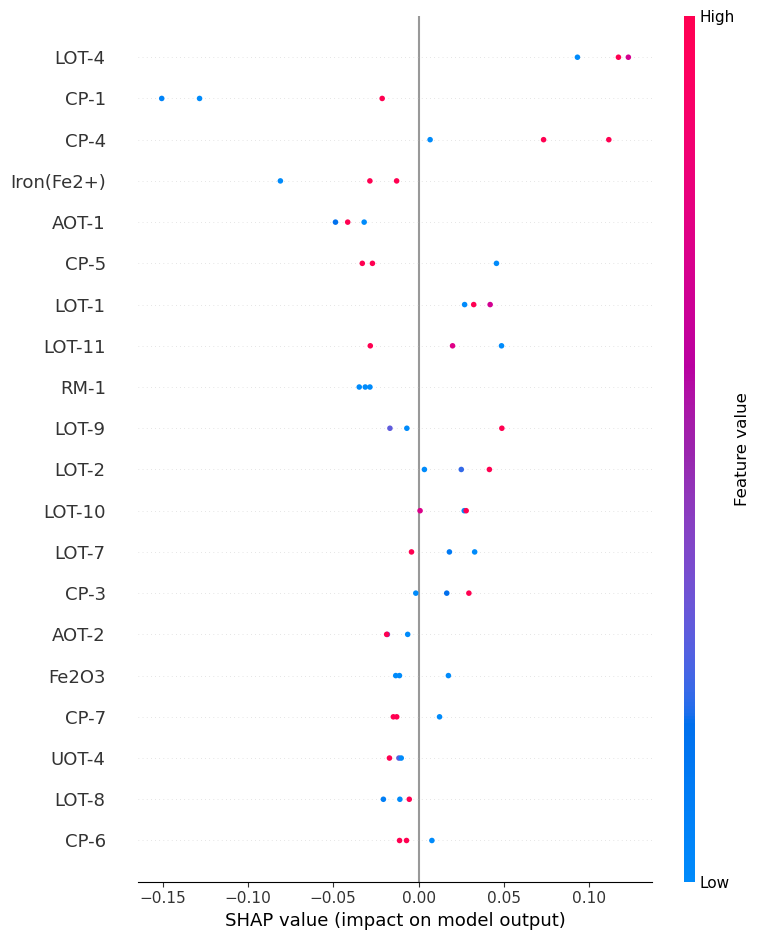

In [5]:
import shap
from xgboost import XGBRegressor
# Initialize dictionary to hold SHAP results
shap_results = {}

# Fit XGBoost model for target 'a'
target_idx = 0  # 'a'
model_name = 'XGBoost_Tuned'

xgb_model = XGBRegressor(
    colsample_bytree=0.7, learning_rate=0.015,
    max_depth=5, n_estimators=350, subsample=0.7,
    reg_alpha=0.5, reg_lambda=1.5, random_state=42
)

xgb_model.fit(X_train_scaled, y_train_scaled[:, target_idx])

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for test set (could use X_train_scaled if you prefer)
shap_values = explainer.shap_values(X_test_scaled)

# Store SHAP results
shap_results[model_name] = shap_values

# Plot SHAP summary (bar plot)
print(f"\nSHAP Summary Plot for {model_name}")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar')

# Full summary plot (beeswarm)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


# shap for feature "b"


SHAP Summary Plot for XGBoost_Tuned


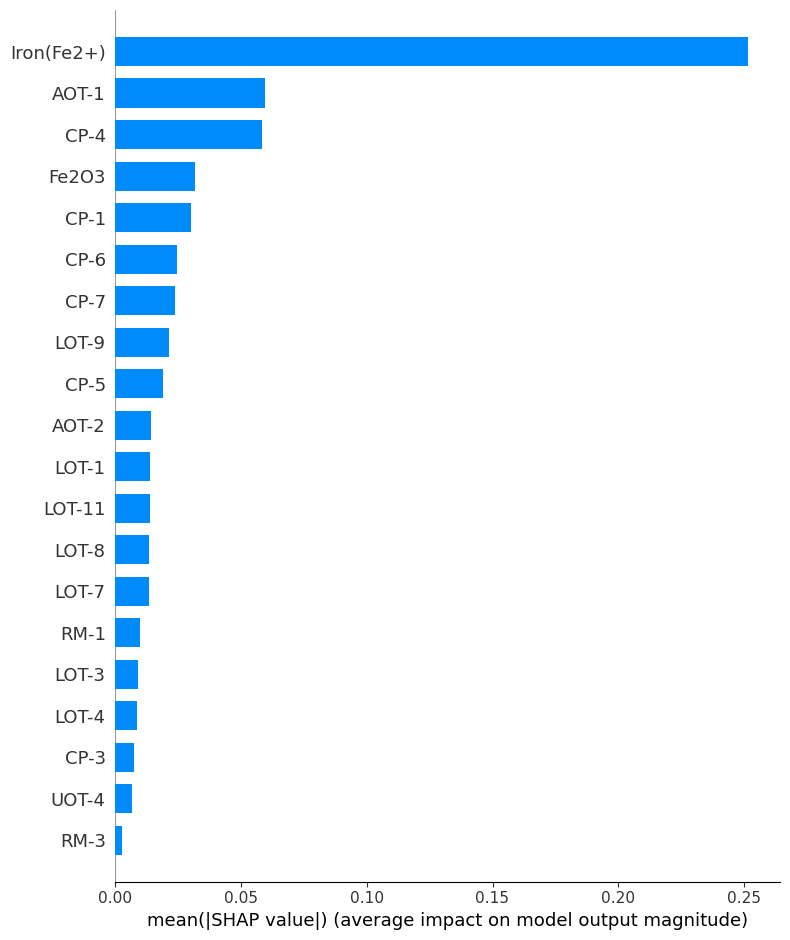

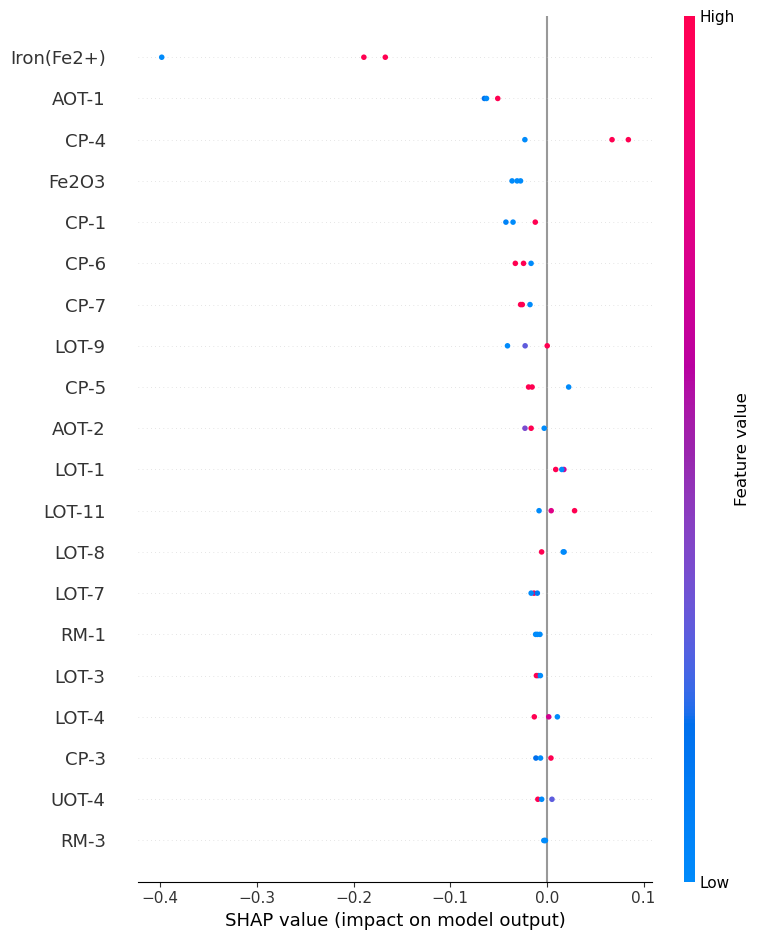

In [6]:
# Initialize dictionary to hold SHAP results
shap_results = {}

# Fit XGBoost model for target 'a'
target_idx = 1  # 'b'
model_name = 'XGBoost_Tuned'

xgb_model = XGBRegressor(
    colsample_bytree=0.7, learning_rate=0.015,
    max_depth=5, n_estimators=350, subsample=0.7,
    reg_alpha=0.5, reg_lambda=1.5, random_state=42
)

xgb_model.fit(X_train_scaled, y_train_scaled[:, target_idx])

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for test set (could use X_train_scaled if you prefer)
shap_values = explainer.shap_values(X_test_scaled)

# Store SHAP results
shap_results[model_name] = shap_values

# Plot SHAP summary (bar plot)
print(f"\nSHAP Summary Plot for {model_name}")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar')

# Full summary plot (beeswarm)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


# ACF and PACF for understanding Lagging

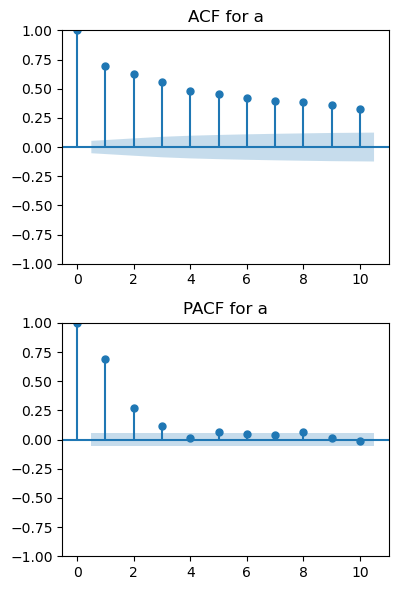

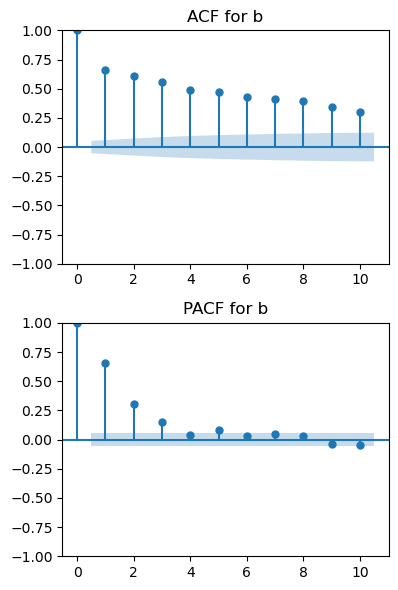

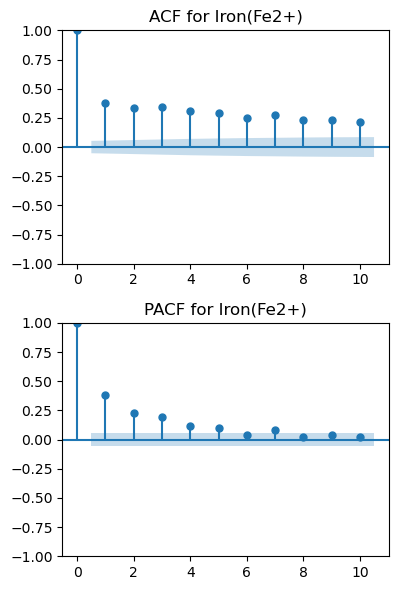

Column 'XRFFe2O3' not found in dataframe, skipping.


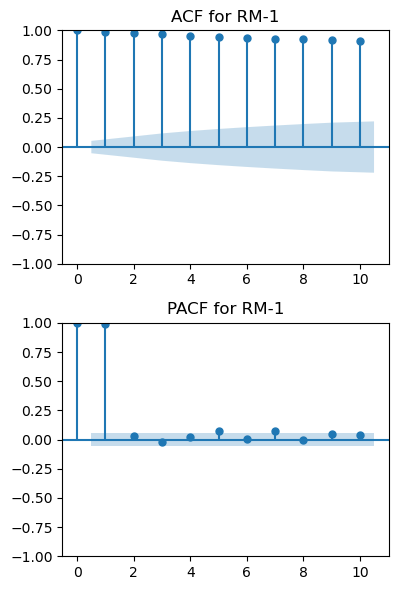

Skipping RM-2: constant or insufficient data.


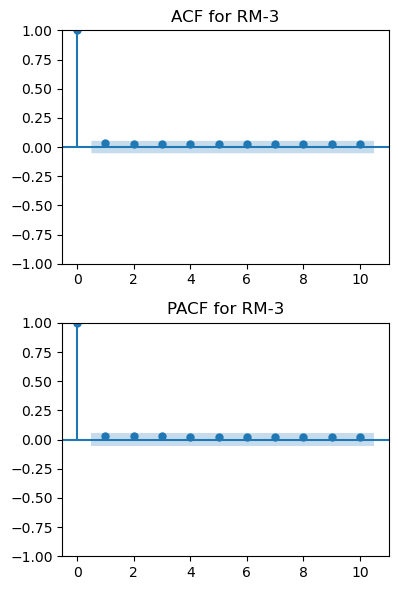

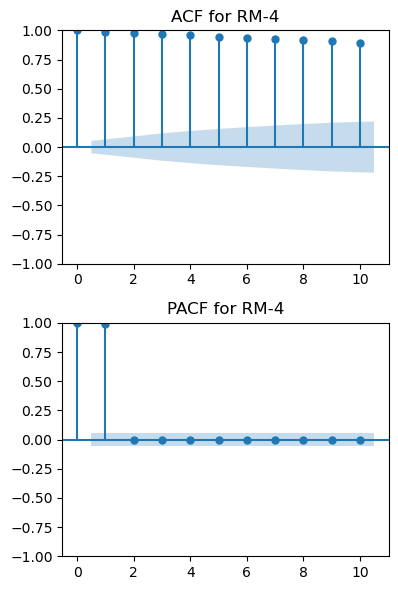

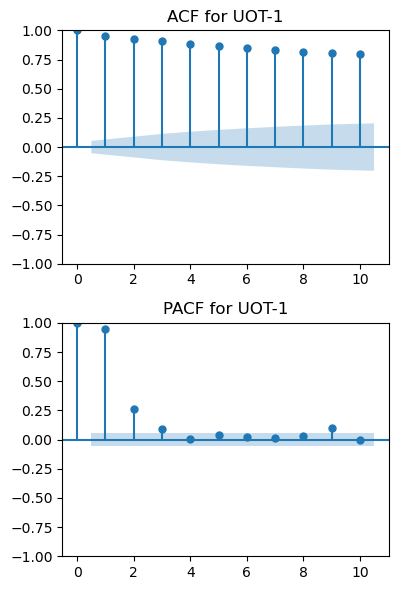

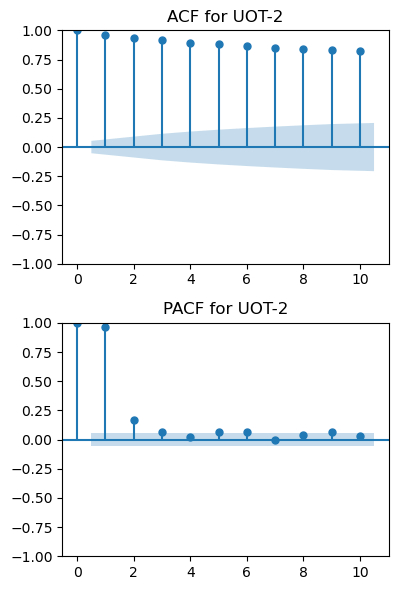

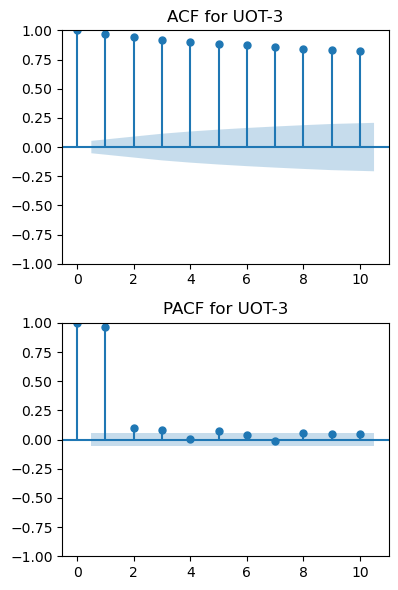

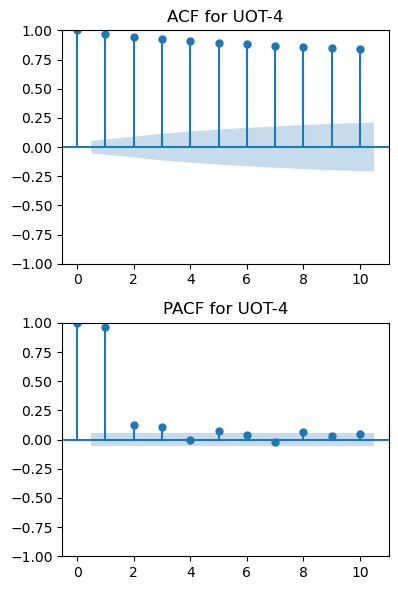

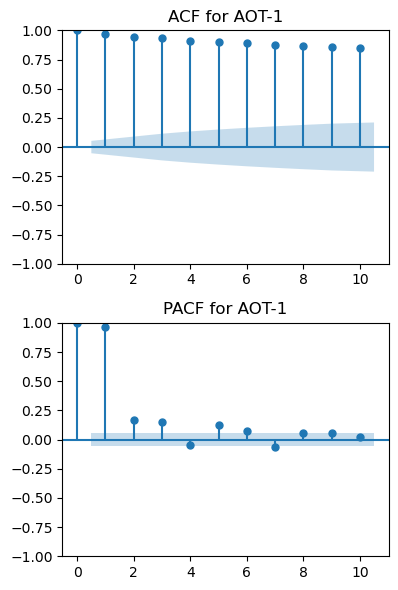

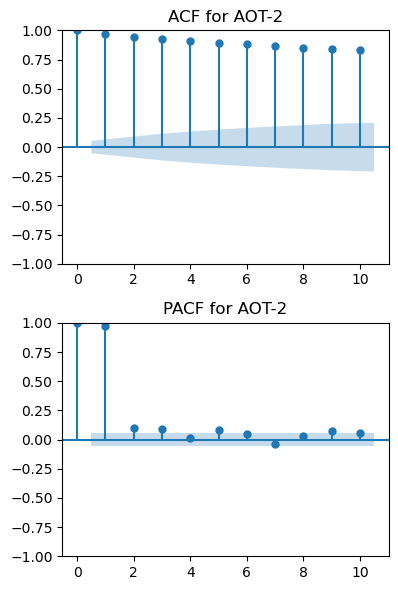

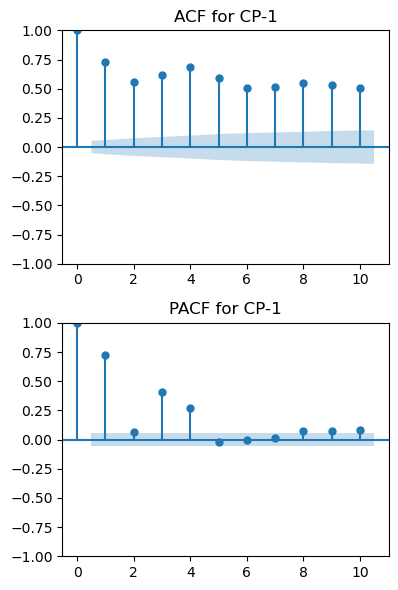

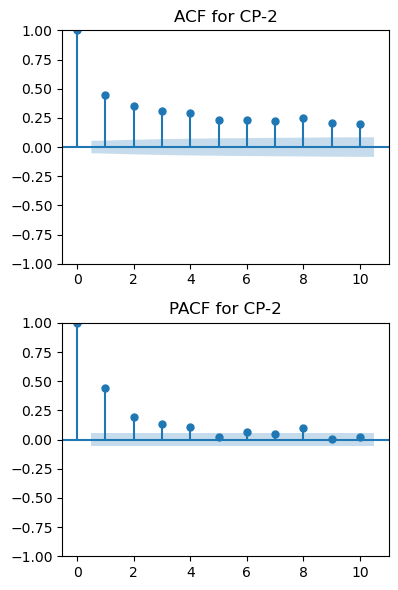

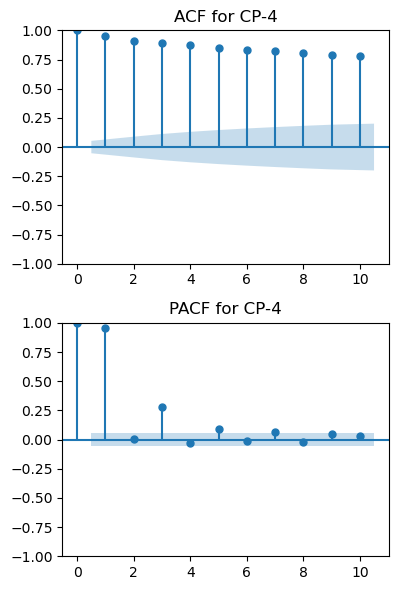

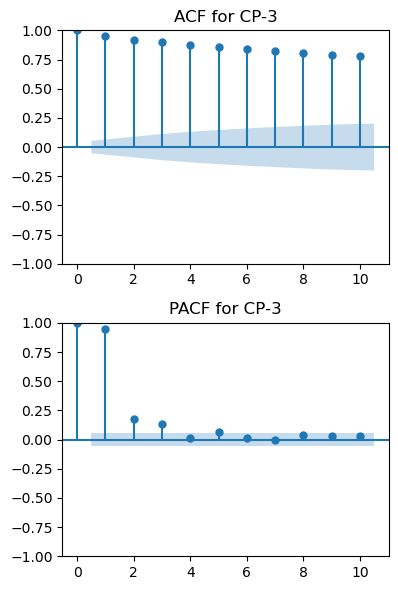

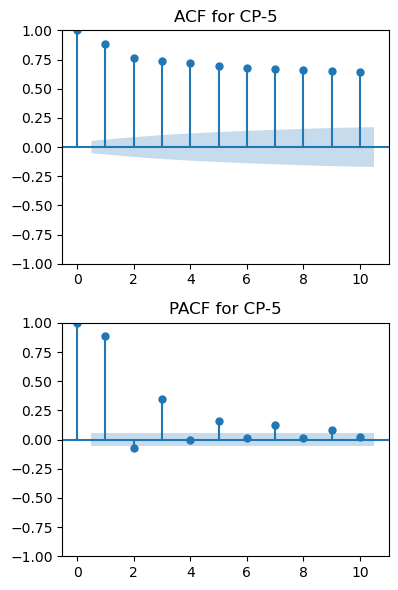

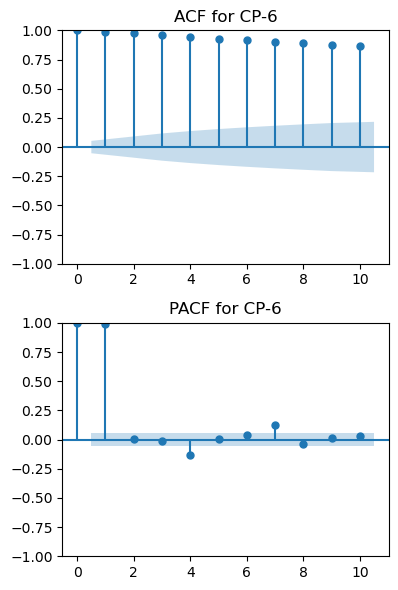

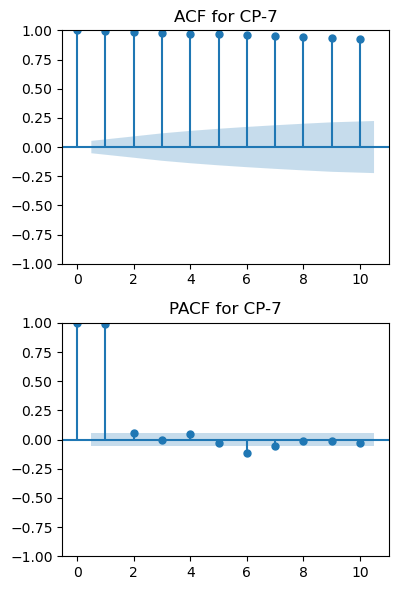

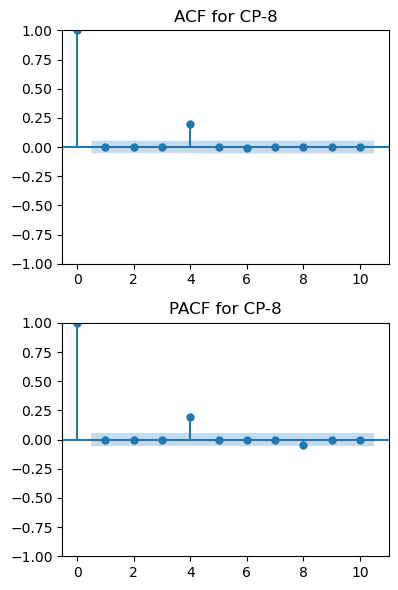

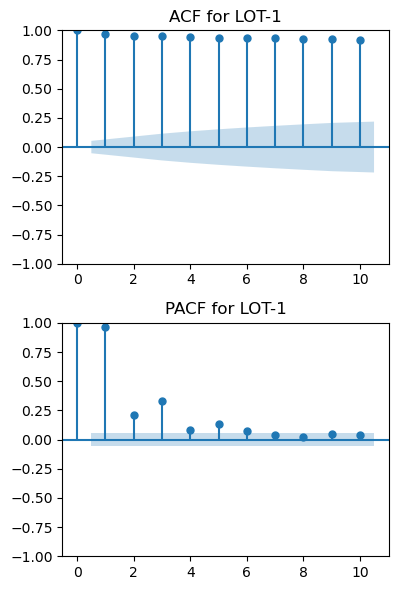

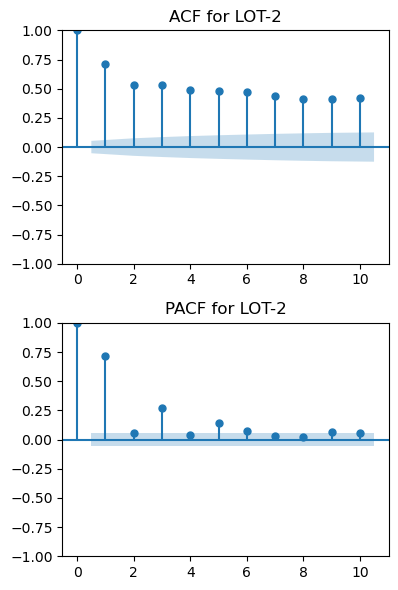

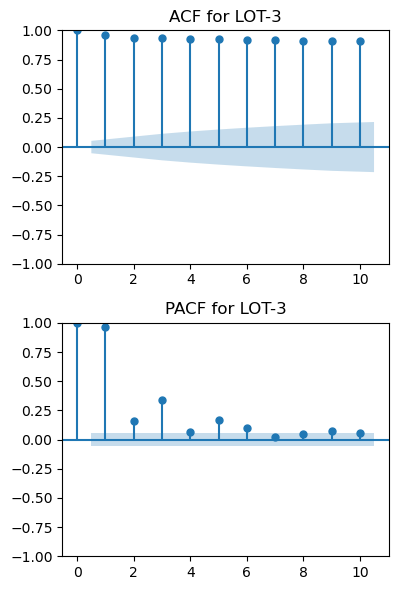

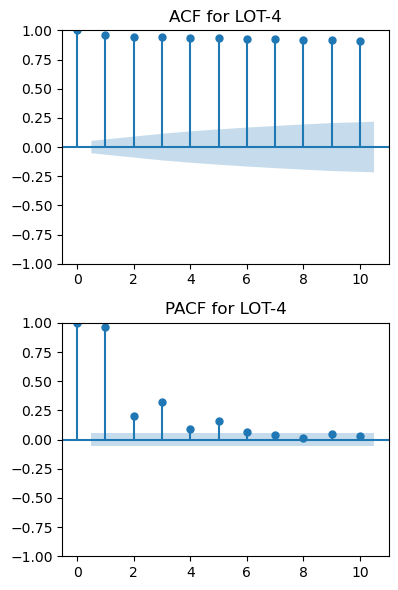

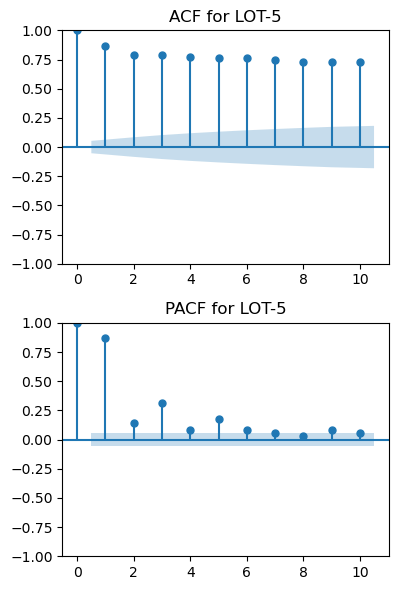

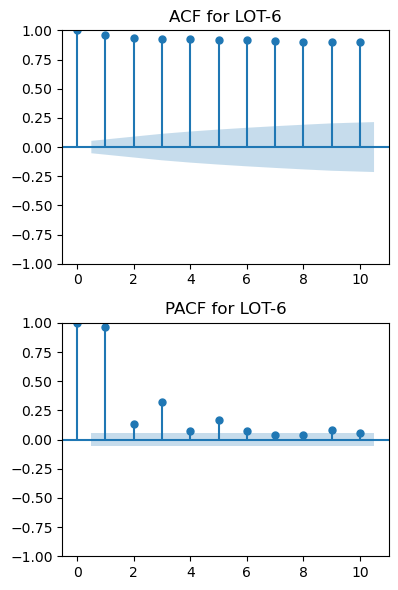

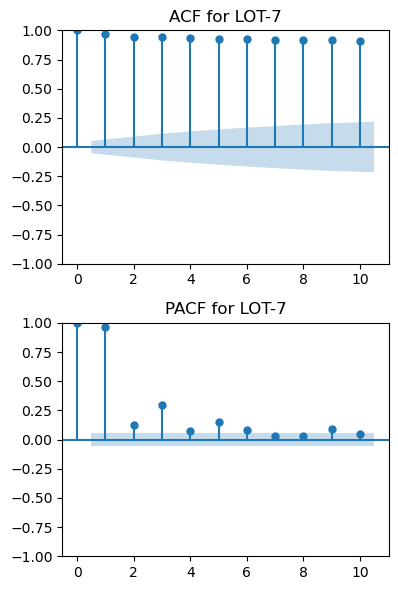

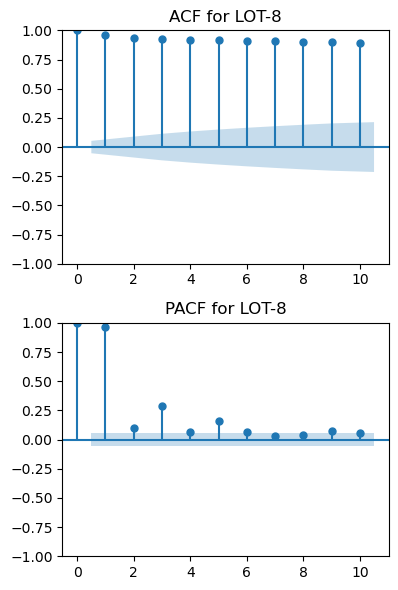

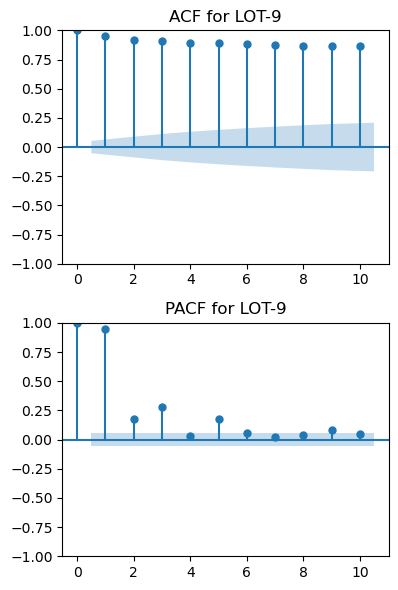

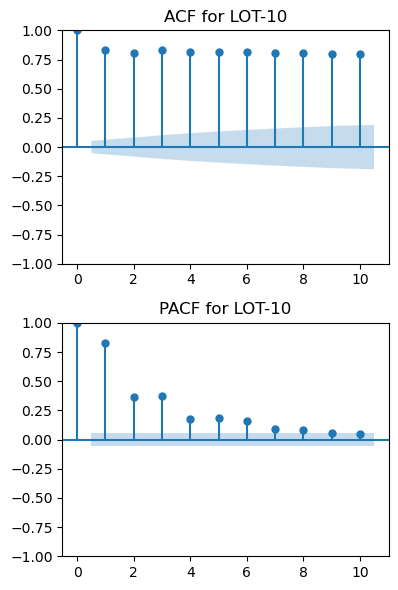

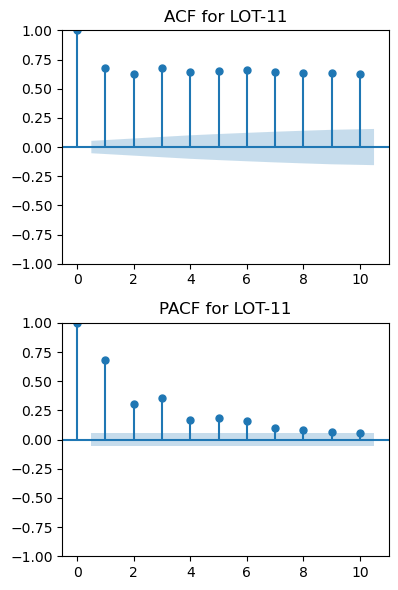

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# List of your target columns
columns_to_plot = ['a', 'b', 'Iron(Fe2+)', 'XRFFe2O3', 'RM-1', 'RM-2', 'RM-3',
       'RM-4', 'UOT-1', 'UOT-2', 'UOT-3', 'UOT-4', 'AOT-1', 'AOT-2', 'CP-1',
       'CP-2', 'CP-4', 'CP-3', 'CP-5', 'CP-6', 'CP-7', 'CP-8', 'LOT-1',
       'LOT-2', 'LOT-3', 'LOT-4', 'LOT-5', 'LOT-6', 'LOT-7', 'LOT-8', 'LOT-9',
       'LOT-10', 'LOT-11']

# Number of lags
num_lags = 10

# Loop through each column and plot ACF/PACF
for col in columns_to_plot:
    if col not in df_clean.columns:
        print(f"Column '{col}' not found in dataframe, skipping.")
        continue

    series = df_clean[col].dropna()

    if series.nunique() <= 1:
        print(f"Skipping {col}: constant or insufficient data.")
        continue

    fig, ax = plt.subplots(2, 1, figsize=(4, 6))

    try:
        # ACF plot
        sm.graphics.tsa.plot_acf(series, lags=num_lags, ax=ax[0])
        ax[0].set_title(f'ACF for {col}')

        # PACF plot
        sm.graphics.tsa.plot_pacf(series, lags=num_lags, ax=ax[1], method='ywm')
        ax[1].set_title(f'PACF for {col}')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not plot for {col}: {e}")
        plt.close()
        continue